# Evaluation of the Multinomial Logistic Regression

The best hyperparameters obtained during the 5-fold Cross Validation Grid Search were:
 * Learning rate: 0.1
 * Number of Iterations: 10000
The data was divided into training and validation with the random state of 42

In [1]:
import sys
sys.path.append('../')
import SGD
from SGD import softmax_logistic
from SGD.experiments import *
from sklearn.model_selection import train_test_split

from utils import dataset_helper
from importlib import reload
from scipy import stats
import pandas as pd
reload(dataset_helper)

/home/azael/Trabalhos/MO444/MO444/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<module 'utils.dataset_helper' from '../utils/dataset_helper.py'>

In [2]:
X, y, _, _  = dataset_helper.load_fasion_mnist(scaling='default')
   
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Samples: 48000
Features: 785
Iteration: 0 Cost= 2.076850778814951
Iteration: 100 Cost= 0.704946388228551
Iteration: 200 Cost= 0.614651925211872
Iteration: 300 Cost= 0.571916407046636
Iteration: 400 Cost= 0.545514834117352
Iteration: 500 Cost= 0.5270703760509761
Iteration: 600 Cost= 0.5132134431299202
Iteration: 700 Cost= 0.5022858136224295
Iteration: 800 Cost= 0.49336412103907873
Iteration: 900 Cost= 0.48588848398253115
Iteration: 1000 Cost= 0.47949722115288085
Iteration: 1100 Cost= 0.47394484693239664
Iteration: 1200 Cost= 0.46905797944821187
Iteration: 1300 Cost= 0.46471009579916145
Iteration: 1400 Cost= 0.4608063195943339
Iteration: 1500 Cost= 0.4572738527544952
Iteration: 1600 Cost= 0.45405573344756045
Iteration: 1700 Cost= 0.45110663343902163
Iteration: 1800 Cost= 0.448389949797526
Iteration: 1900 Cost= 0.4458757433484176
Iteration: 2000 Cost= 0.44353924608133405
Iteration: 2100 Cost= 0.4413597600463869
Iteration: 2200 Cost= 0.43931983139386216
Iteration: 2300 Cost= 0.437404621488

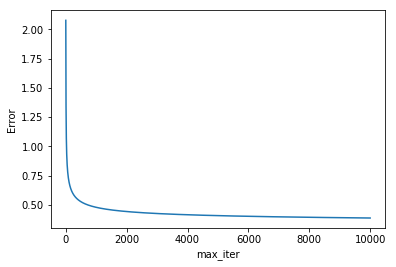


--- Classification
[8 8 7 ... 8 8 6]

--- Expected Output
[8 8 7 ... 8 8 1]
Validation Stats...
Accuracy: 0.854
Precision: 0.854
Recall: 0.855
F1 Score: 0.854234
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}
Confusion matrix, without normalization
Normalized confusion matrix


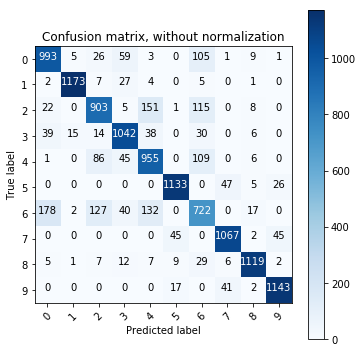

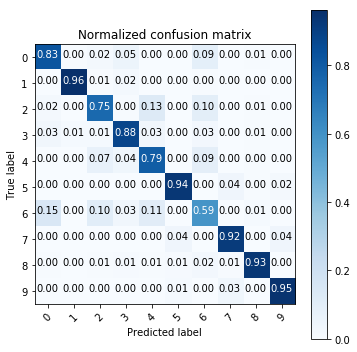

In [4]:
lr = 0.1
max_iter = 10000
theta,acc = softmax_logistic.BGD(X_train,y_train,lr,max_iter,print_interval=100)

predY = softmax_logistic.classify_softmax(theta,X_val)

print("\n--- Classification")
print(predY)
print("\n--- Expected Output")
print(y_val)

from utils.custom_scores import evaluate_multiclass
evaluate_multiclass(y_val, predY)